DIVA

In [1]:
%matplotlib inline
import os
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker


In [2]:
from exploration.data.data import load_sim_h5
from exploration.data.PlotTools import *
from exploration.algorithm.utils.logging import read_config_log

In [3]:
def create_dict(groups_k):
    return {k[0] + '_' + k[1]: [] for k in groups_k}


def incremental_mean(arr_):
    n_samples = len(arr_)
    sum_ = 0
    out = []
    for i in range(n_samples):
        sum_ += arr_[i]
        out += [sum_/(i + 1.)]
    out = np.array(out).flatten()
    return out

def moving_av(arr_, win_sz):
    n_samples = len(arr_)
    sum_ = 0
    out = []
    for i in range(win_sz):
        sum_ += arr_[i]
        out += [sum_/(i + 1.)]
    for i in range(win_sz,n_samples):
        sum_ = sum_ + arr_[i] - arr_[i-win_sz]
        out += [sum_/win_sz]
    out = np.array(out).flatten()
    return out

def std_markers(ax,y,m,c,sz):
    plt.sca(ax)
    plt.hold(True)
    for i,(y_,ms_) in enumerate(zip(y,sz)):
        plt.plot(i, y_, marker = m, ms = ms_, color = c)

In [4]:
directory = 'diva_experiment_thesis_chap_5/'
data_files = os.listdir(directory)
n_exp = 102000
# Group by:
type_ops = ['proprio', 'simple']
mode_ops = ['autonomous']

groups_k = list(itertools.product(type_ops, mode_ops))

means_s = create_dict(groups_k)
means_av_s = create_dict(groups_k)

means_w = create_dict(groups_k)
means_av_w = create_dict(groups_k)

coll_s = create_dict(groups_k)
coll_av_s = create_dict(groups_k)

coll_w = create_dict(groups_k)
coll_av_w = create_dict(groups_k)

inter = create_dict(groups_k)
inter_av = create_dict(groups_k)

error_ev = create_dict(groups_k)
error_ev_av = create_dict(groups_k)

std_ev = create_dict(groups_k)

comp_w = create_dict(groups_k)
comp_av_w = create_dict(groups_k)

for data_file in (d_f for d_f in data_files if 'sim_data.h5' in d_f):
    data_file = directory + data_file
    conf_file = data_file.replace('sim_data.h5', 'conf.txt')
    conf = read_config_log(conf_file)
#     with open(conf_file) as f:
#         for line in f:
#             line = line.replace('\n', '')
#             (key, val) = line.split(': ')
#             conf[key] = val
    if conf['mode']=='social':
        continue
#     try:
    whole_data, foo = load_sim_h5(data_file)
    interaction_data = whole_data.social.data.as_matrix(columns=None)
    interactions = np.zeros((interaction_data.shape[0],))
    interactions[~np.isnan(interaction_data[:, 0])] = 1
#         print(np.sum(interactions))


    social_data, foo = load_sim_h5(data_file.replace('sim_data.h5', '_German_Vowels_sensor_eva_valset.h5'))

    s_error_ = np.linalg.norm(social_data.sensor_goal.data.as_matrix() -
                              social_data.sensor.data.as_matrix(), axis=1)


    s_con_v = social_data.somato.data.as_matrix()

    w_error_ = np.linalg.norm(whole_data.sensor_goal.data.as_matrix() -
                              whole_data.sensor.data.as_matrix(), axis=1)

    w_con_v = whole_data.cons.data.as_matrix()

    w_comp_w = whole_data.competence.data.as_matrix()

    eva_errors = []
    with open(data_file.replace('sim_data.h5', '_German_Vowels_eval_error.txt'), 'r') as f:
        for line in f:
            line.replace('\n','')
            eva_errors_str = line.split(': ')
            eva_errors += [float(eva_errors_str[1])]

    means_s[conf['type'] + '_' + conf['mode']] += [np.mean(s_error_)]
    means_w[conf['type'] + '_' + conf['mode']] += [np.mean(w_error_)]

    coll_s[conf['type'] + '_' + conf['mode']] += [s_con_v[:n_exp]]
    coll_w[conf['type'] + '_' + conf['mode']] += [w_con_v[:n_exp]]

    inter[conf['type'] + '_' + conf['mode']] += [interactions[:n_exp]]

    error_ev[conf['type'] + '_' + conf['mode']] += [eva_errors]

    comp_w[conf['type'] + '_' + conf['mode']] += [w_error_[:n_exp]]
        
#         print(conf['type'] + '_' + conf['mode'])
#         print(np.sum(interactions))
#     except IOError:
#         pass

max_std=0
for i, k in enumerate(groups_k):
    group = k[0] + '_' + k[1]

    means_av_s[group] = np.mean(np.array(means_s[group]))
    means_av_w[group] = np.mean(np.array(means_w[group]))

    coll_av_s[group] = np.mean(np.array(coll_s[group]), axis=0)
    coll_av_w[group] = np.mean(np.array(coll_w[group]), axis=0)

    inter_av[group] = np.mean(np.array(inter[group]), axis=0)

    comp_av_w[group] = np.mean(np.array(comp_w[group]), axis=0)
    
    error_ev_av[group]= np.mean(np.array(error_ev[group]),axis=0)
    std_ev[group] = np.std(np.array(error_ev[group]),axis=0)
    max_std = max(max_std,max(std_ev[group].flatten()))
print(max_std)

0.286845740733


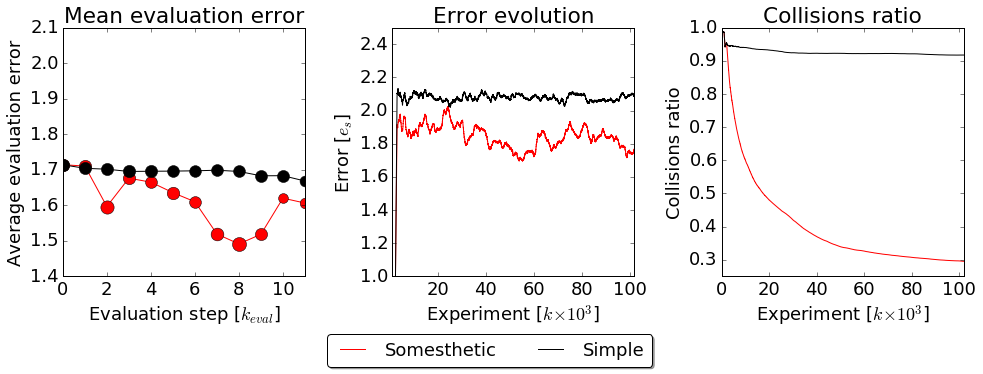

In [7]:
matplotlib.rcParams['figure.figsize'] = (14.0, 5.)
matplotlib.rcParams.update({'font.size': 18})


fig1, ax1 = plt.subplots(1,3)
plt.sca(ax1[0])
ax1[0].set_title('Mean evaluation error')
plt.hold(True)
# plt.plot(error_ev_av['proprio_social'], linestyle='-', marker='', color='b')
# ms1 = [(x/max_std)*13 + 1 for x in std_ev['proprio_social']]

plt.plot(error_ev_av['proprio_autonomous'], linestyle='-', marker='', color='r')
ms2 = [(x/max_std)*13 + 1 for x in std_ev['proprio_autonomous']]

# plt.plot(error_ev_av['simple_social'], linestyle='-', marker='', color='g')
# ms3 = [(x/max_std)*13 + 1 for x in std_ev['simple_social']]

plt.plot(error_ev_av['simple_autonomous'], linestyle='-', marker='', color='k')
ms4 = [(x/max_std)*13 + 1 for x in std_ev['simple_autonomous']]

# std_markers(ax1[0],error_ev_av['proprio_social'],'o','b',ms1)
std_markers(ax1[0],error_ev_av['proprio_autonomous'],'o','r',ms2)
# std_markers(ax1[0],error_ev_av['simple_social'],'o','g',ms3)
std_markers(ax1[0],error_ev_av['simple_autonomous'],'o','k',ms4)

plt.xlabel('Evaluation step [$k_{eval}$]')
plt.ylabel('Average evaluation error')
# plt.legend(['(Proprio, Social)', '(Proprio, Auto)', '(Simple, Social)', '(Simple, Auto)'],\
#            ncol=2,loc='lower right', fontsize=13)
ax1[0].set_xlim([0,11])
ax1[0].set_ylim([1.4,2.1])

x = np.linspace(0, len(incremental_mean(coll_av_w['proprio_autonomous'])), len(incremental_mean(coll_av_w['proprio_autonomous'])))
scale_x = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
plt.sca(ax1[1])
ax1[1].set_title('Error evolution')
# plt.plot(moving_av(comp_av_w['proprio_social'],1000), linestyle='-', marker='', color='b')
plt.hold(True)
plt.plot(moving_av(comp_av_w['proprio_autonomous'],1000), linestyle='-', marker='', color='r')
# plt.plot(moving_av(comp_av_w['simple_social'],1000), linestyle='-', marker='', color='g')
plt.plot(moving_av(comp_av_w['simple_autonomous'],1000), linestyle='-', marker='', color='k')
ax1[1].set_xlabel('Experiment [$k$' + r'$\times$' + '$10^3$]')
plt.ylabel('Error [$e_s$]')
# plt.legend(['(Proprio, Social)', '(Proprio, Auto)', '(Simple, Social)', '(Simple, Auto)'],\
#            ncol=2,loc='lower right', fontsize=13)
ax1[1].set_xlim([1000,n_exp])
ax1[1].set_ylim([1,2.5])
ax1[1].xaxis.set_major_formatter(ticks_x)


plt.sca(ax1[2])
ax1[2].set_title('Collisions ratio')
# plt.plot(incremental_mean(coll_av_w['proprio_social']), linestyle='-', marker='', color='b')
plt.hold(True)
plt.plot(x,incremental_mean(coll_av_w['proprio_autonomous']), linestyle='-', marker='', color='r')
# plt.plot(incremental_mean(coll_av_w['simple_social']), linestyle='-', marker='', color='g')
plt.plot(x,incremental_mean(coll_av_w['simple_autonomous']), linestyle='-', marker='', color='k')
ax1[2].set_xlabel('Experiment [$k$' + r'$\times$' + '$10^3$]')
ax1[2].set_ylabel('Collisions ratio')
lgd = plt.legend(['Somesthetic', 'Simple'],\
            ncol=2,loc='lower right',fontsize=18, bbox_to_anchor=(-0.25, -0.4),
          fancybox=True, shadow=True)
ax1[2].set_xlim([0,n_exp])
ax1[2].set_ylim([0.25,1])
ax1[2].xaxis.set_major_formatter(ticks_x)

plt.tight_layout()

In [6]:
# fig1.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/Epirob 2017/images/vt_results.eps',\
#              format='eps', dpi=1000,bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig1.savefig(directory + 'vt_results.eps',\
#            format='eps', dpi=1000,bbox_extra_artists=(lgd,), bbox_inches='tight')

In [18]:
conf['type']

'proprio'

In [ ]:
whole_data.cons